### <center>Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import RocCurveDisplay,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
data.isnull().mean()*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [5]:
data.drop(columns=['deck','embark_town','alive'],inplace=True)

In [6]:
data.age.fillna(data.age.mean(),inplace=True)

In [7]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alone'],
      dtype='object')

In [8]:
le = LabelEncoder()

In [9]:
for i in data.columns:
    if data[i].dtype != 'int64' and 'float64':
        data[i]=le.fit_transform(data[i])

In [10]:
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,1,28,1,0,18,2,2,1,1,0
1,1,1,0,52,1,0,207,0,0,2,0,0
2,1,3,0,34,0,0,41,2,2,2,0,1
3,1,1,0,48,1,0,189,2,0,2,0,0
4,0,3,1,48,0,0,43,2,2,1,1,1


In [11]:
x = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [12]:
sc = StandardScaler()

In [13]:
x = sc.fit_transform(x)

In [14]:
models = {'LogisticRegression' : LogisticRegression(),
    'Randomforestclassifier' : RandomForestClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'AdaBoostClassifier' : AdaBoostClassifier(),
    'GradientBoostingClassifier' : GradientBoostingClassifier(),
    'KNeiborsClassifier' : KNeighborsClassifier()}

#### Model Selection Using Cross Validation

In [15]:
for name,model in models.items():
    Scores = cross_val_score(model,x,y,scoring='accuracy',cv=10,n_jobs=-1)
    print('cross validation model : {}'.format(name))
    print('mean score :',np.mean(Scores)*100)
    print('*'*100)

cross validation model : LogisticRegression
mean score : 81.93133583021223
****************************************************************************************************
cross validation model : Randomforestclassifier
mean score : 80.92883895131087
****************************************************************************************************
cross validation model : DecisionTreeClassifier
mean score : 79.80149812734084
****************************************************************************************************
cross validation model : AdaBoostClassifier
mean score : 81.37453183520599
****************************************************************************************************
cross validation model : GradientBoostingClassifier
mean score : 82.9450686641698
****************************************************************************************************
cross validation model : KNeiborsClassifier
mean score : 81.8239700374532
*******************************

#### We are selecting the GradientBoostingClassifier as our model since it is having the highest score

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
model = GradientBoostingClassifier()

In [19]:
model.fit(x_train,y_train)
print('model trained with : GradientBoostingClassifier')
score_train = accuracy_score(y_train,model.predict(x_train))
score_test = accuracy_score(y_test,model.predict(x_test))
conf_train = confusion_matrix(y_train,model.predict(x_train))
conf_test = confusion_matrix(y_test,model.predict(x_test))
print('model accuracy on train is :', score_train)
print('model accuracy on test is :', score_test)
print('confusion matrix train is :', conf_train)
print('confusion matrix test is :' ,conf_test)
print('wrong predictions made :',(y_test !=model.predict(x_test)).sum(),'/',((y_test==model.predict(x_test)).sum()+(y_test!=model.predict(x_test)).sum()))

model trained with : GradientBoostingClassifier
model accuracy on train is : 0.8974719101123596
model accuracy on test is : 0.8268156424581006
confusion matrix train is : [[417  22]
 [ 51 222]]
confusion matrix test is : [[100  10]
 [ 21  48]]
wrong predictions made : 31 / 179


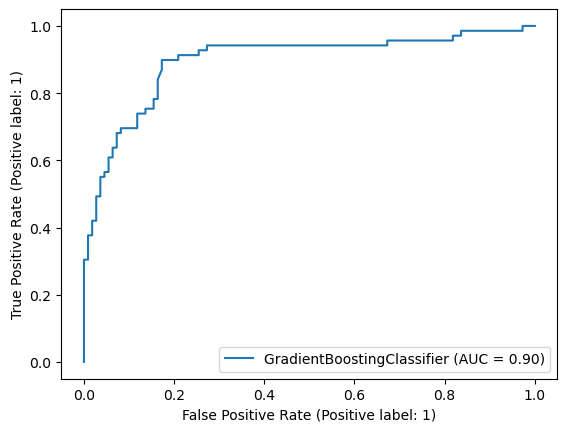

In [20]:
ROC_Display = RocCurveDisplay.from_estimator(model,x_test,y_test)